In [6]:
import models
import pandas as pd

db=models.tt_twitter()

database=pd.read_sql('''SELECT * FROM tt_twitter''', db.con)

print (database)

     top                     tittles    twitts        date      time
0      1                       Messi       NaN  2022-11-16  22:00:03
1      2                       Foyth   23100.0  2022-11-16  22:00:03
2      3  #TimsTwitterListeningParty  101000.0  2022-11-16  22:00:03
3      4                  #NinoNoqui   62000.0  2022-11-16  22:00:03
4      5                #CFKGolpista    4913.0  2022-11-16  22:00:03
..   ...                         ...       ...         ...       ...
316   26                       Acuña   11300.0  2022-11-16  22:48:46
317   27                 DT de River    1721.0  2022-11-16  22:48:46
318   28                    Traidora    3669.0  2022-11-16  22:48:46
319   29                Constitución   69300.0  2022-11-16  22:48:46
320   30           #AFueraMalassezia       NaN  2022-11-16  22:48:46

[321 rows x 5 columns]


Podemos observar que se realizó un scrapping durante una hora sobre los trending toppics de twitter para analizar el crecimiento de los tops, podemos utilizar 2 trendings como ejémplos para analizar la dependencia del top.

[281000, 279000, 279000, 280000, 280000, 281000, 281000, 282000, 282000]


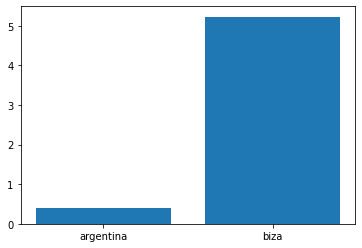

Tops del trending toppic argentina:  [(11,), (27,), (28,), (28,), (30,), (30,), (30,), (30,), (30,)]
twitts del trending toppic argentina:  [281000, 279000, 279000, 280000, 280000, 281000, 281000, 282000, 282000]
tops del trendig toppic biza:  [(9,), (8,), (8,), (9,), (9,), (9,), (9,), (9,), (9,)]
twitts del trending toppic argentina:  [13300, 13600, 13900, 14100, 14400, 14700, 14900, 15300, 15500]


In [3]:
import matplotlib.pyplot as plt
import statistics
from models import tt_twitter
import numpy as np

db= tt_twitter()


argentina=db.where_con("""SELECT twitts FROM tt_twitter WHERE tittles = "Argentina";""")
biza=db.where_con("""SELECT twitts FROM tt_twitter WHERE tittles = "Biza";""")

print (argentina)

cv = lambda x: np. std (x, ddof = 1 ) / np. mean (x) * 100 

x = cv(argentina)
y = cv(biza)

tittles=["argentina","biza"]

fig, ax = plt.subplots(1, sharey = True)

ax.bar(tittles,[x,y])
plt.show()

print ("Tops del trending toppic argentina: ",db.read_where("""SELECT top FROM tt_twitter WHERE tittles = "Argentina";"""))
print ("twitts del trending toppic argentina: ",argentina)

print ("tops del trendig toppic biza: ",db.read_where("""SELECT top FROM tt_twitter WHERE tittles = "Biza";"""))
print ("twitts del trending toppic argentina: ", biza)


Podemos observar que el trending no depende de la cantidad de twitts en el momento sino del coeficiente de variación que determina la velocidad que aumenta la cantidad de twitts.